# Presentación Data Science- Soy Henry- Francisco Negrete

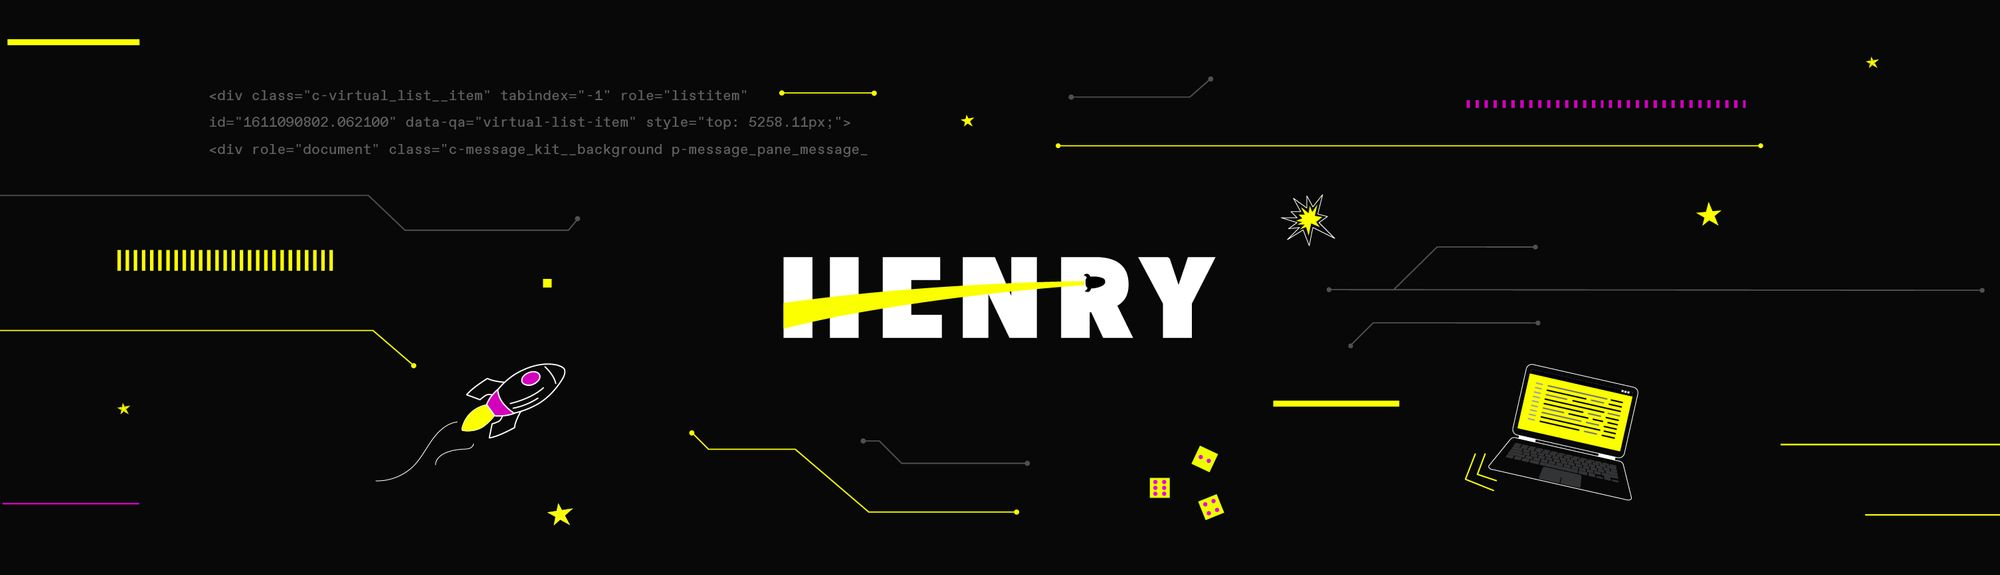

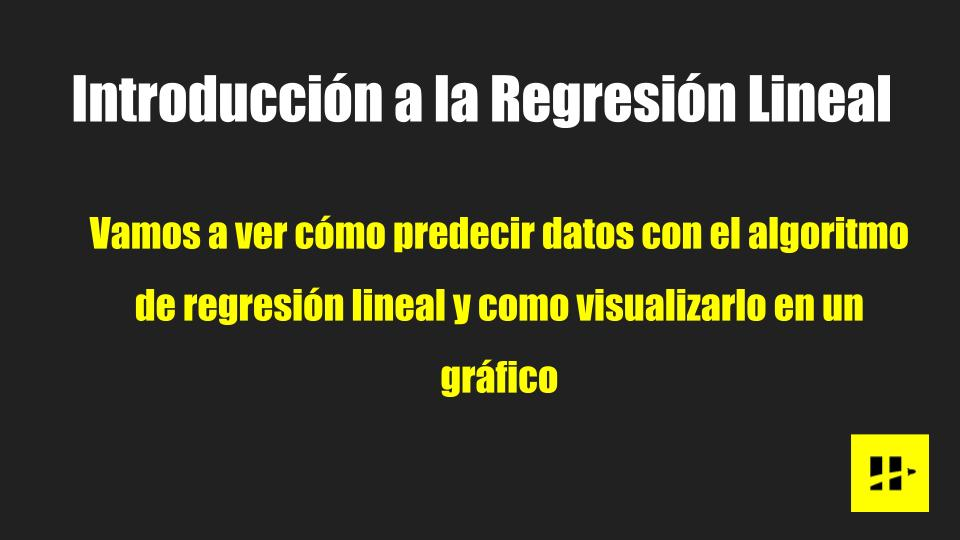

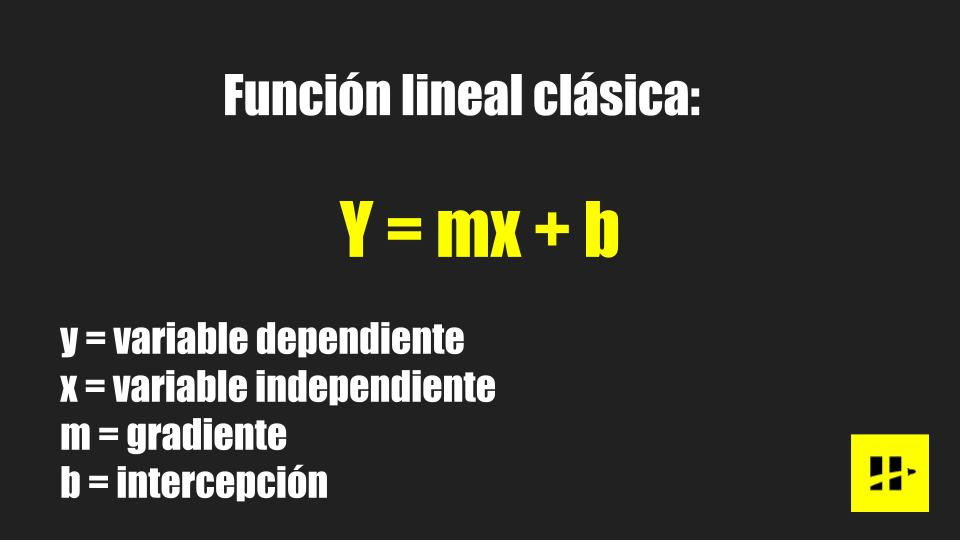

In [7]:
#Importamos las librerías necesarias
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

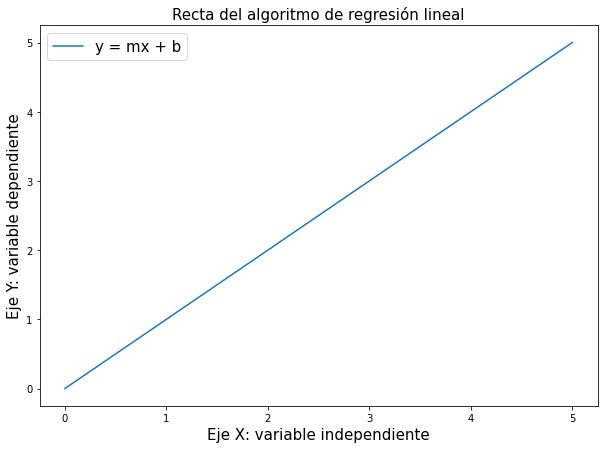

In [5]:
#Tamaño de la figura
plt.figure(figsize=(10, 7))
 
#Variable del eje x de la ecuación lineal: y= 1*x+0
x = [0, 1, 2, 3, 4, 5]
 
#Variable del eje y con una list comprehension 
y = [(x * 1 + 0) for x in x] #Si se pone otra función, cuadrática por ejemplo, python también la va a graficar

#Con plt.plot() se arman nuestros gráficos. Los argumentos son los dos ejes x e y
plt.plot(x, y)

#Leyenda de la figura
plt.legend(["y = mx + b"], fontsize=15)

#Proporcionamos los nombres a los ejes
plt.xlabel("Eje X: variable independiente", fontsize=15)
plt.ylabel("Eje Y: variable dependiente", fontsize=15)
plt.title('Recta del algoritmo de regresión lineal', fontsize=15)
 
#Graficar la figura
plt.show()

En el siguiente gráfico vemos una "nube" de puntos, los cuales representan los datos de nuestro modelo.

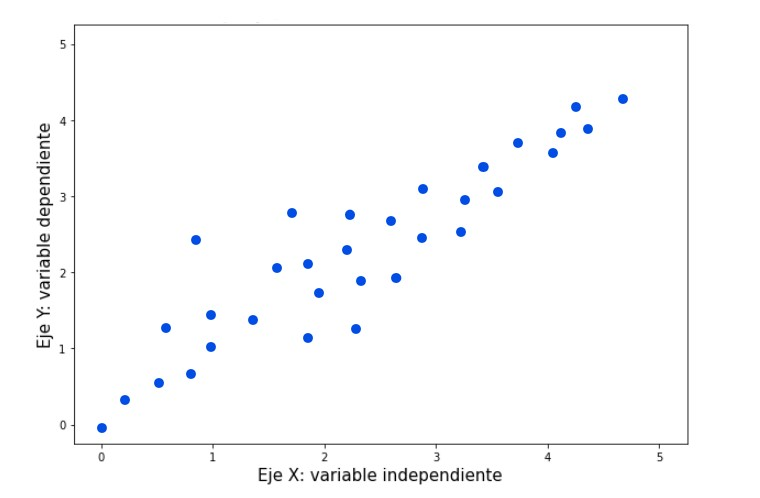

La recta de la regresión es la que menor error (mínimo) de distancia tiene entre los puntos de nuestros datos. Es por eso que solamente se esa recta en particular, y no otra que pase por otra intercepción y/ o con otro gradiente.

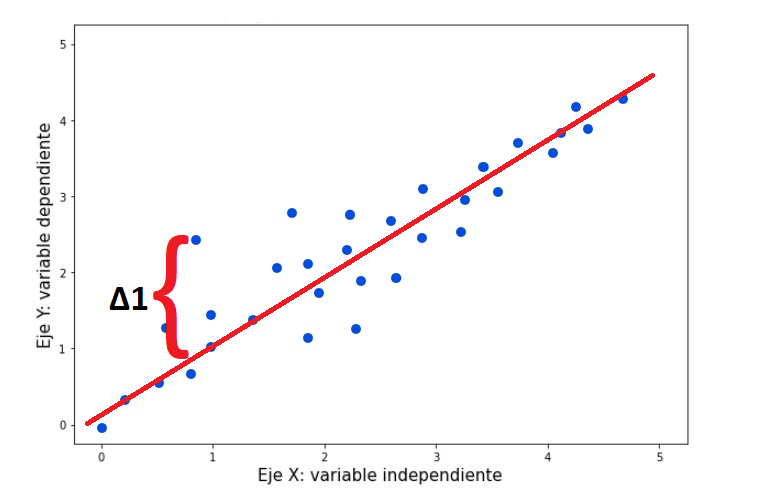

# Ejemplos de Regresión Lineal

## 1. Caso de horas de estudio y resultados académicos

In [69]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df2=pd.read_csv(url)
df2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Vemos la correlación entre las variables (opcional para este ejemplo)
df_corr = df2.corr()
#Graficamos la correlación
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_corr, annot=True)
plt.show()

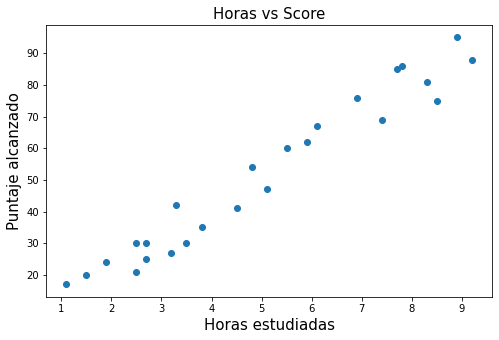

In [70]:
#Tamaño de la figura
plt.figure(figsize=(8, 5))
#Ploteamos las dos variables en un gráfico de dispersión
plt.scatter(df2.Hours, df2.Scores)
#Ponemos nombres y etiquetas
plt.xlabel("Horas estudiadas", fontsize=15)
plt.ylabel("Puntaje alcanzado", fontsize=15)
plt.title('Horas vs Score', fontsize=15)
#Graficar la figura
plt.show()

In [10]:
#Preparacion de datos
X = df2["Hours"].values.reshape(-1,1)
y = df2["Scores"]

In [57]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#El fit ajusta los parámetros del modelo para mejorar la precisión 

LinearRegression()

In [71]:
#Predicción de resultado académico de acuerdo a la cantidad de horas estudiadas
regressor.predict([[6]])

array([61.48209893])

In [60]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)

In [61]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [62]:
#Método para encontrar la gradiente de mi función
grad = regressor.coef_

In [63]:
#Método para encontrar la intercepción de mi función con el eje y
inter = regressor.intercept_

In [74]:
#Comprobación manual de los valores predecidos
cant_horas = float(input())

pred_manual = grad * cant_horas + inter

print("Si yo estudio",cant_horas , "horas, mi nota final va a ser", round(float(pred_manual), 1), "puntos")

10
Si yo estudio 10.0 horas, mi nota final va a ser 101.1 puntos


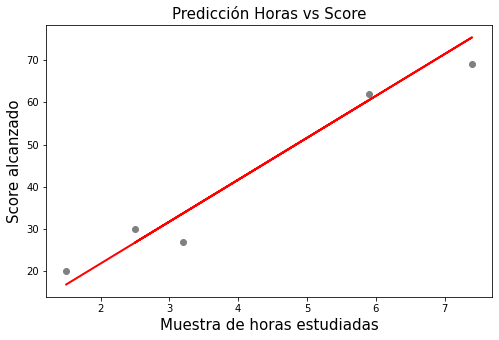

In [67]:
#Graficamos una línea recta con los datos que tomamos de prueba
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Muestra de horas estudiadas', fontsize = 15)
plt.ylabel('Score alcanzado',fontsize = 15)
plt.title('Predicción Horas vs Score', fontsize=15)
plt.show()

In [73]:
#Evaluar el puntaje del testing
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.9454906892105356


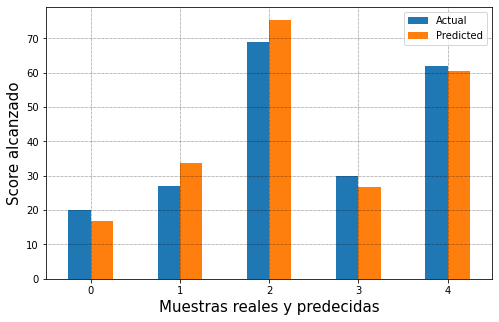

In [200]:
#Comparación entre el valor real y el predecido
df1 = df
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Muestras reales y predecidas', fontsize = 15)
plt.ylabel('Score alcanzado',fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

## Aclaraciones sobre el modelo:  
Siempre existen una serie de consideraciones que  deberíamos tener en cuenta cuando estamos realizando modelos predictivos (y descriptivos) para analizar un escenario o situación. En este caso particular:  
- No se puede estudiar una cantidad de horas negativas  
- Este modelo solamente comprende estudiar hasta 10 horas para un examen  
- Pasado ese número (10 hs), el score sigue incrementando de manera lineal, aunque el tope de puntaje para una evaluación es de máximo 100
- Cuantos más datos tengamos, más preciso podría llegar a ser nuestro resultado de testing
- Este modelo no contempla ninguna contingencia por fuera de la cantidad de horas de estudio. Por ejemplo, si se tienen 10 temas para repasar, y se estudian 10 horas solamente del tema 1, el score esperado sería de 10, cuando podría no ser lo que suceda en la práctica

## 2. Caso de peso y precio de diamantes

In [1]:
from pydataset import data

initiated datasets repo at: C:\Users\usuario\.pydataset/


In [104]:
c = data("Diamond")
c

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
304,1.01,I,VS1,HRD,8175
305,1.02,F,VVS2,HRD,10796
306,1.06,H,VVS2,HRD,9890
307,1.02,H,VS2,HRD,8959


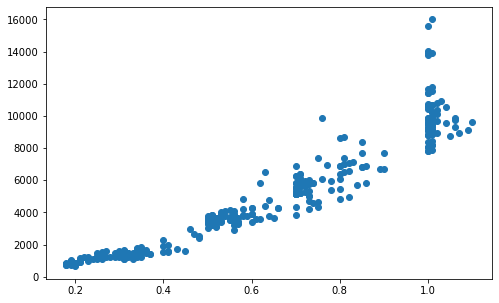

In [105]:
#Tamaño de la figura
plt.figure(figsize=(8, 5))
#Ploteamos las dos variables
plt.scatter(c.carat, c.price)
#Ponemos nombres y etiquetas

#Graficar la figura
plt.show()

In [135]:
X = c["carat"].values.reshape(-1,1)
y = c["price"]

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = regr.predict(X_test)

In [145]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4.head()

,Actual,Predicted
64,4300,5392.952109
248,3785,5161.740874
294,13909,9439.148717
125,9619,9323.543100
189,1199,999.938649


In [142]:
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.9017870317564749


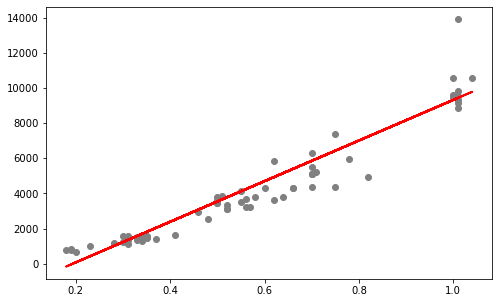

In [144]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

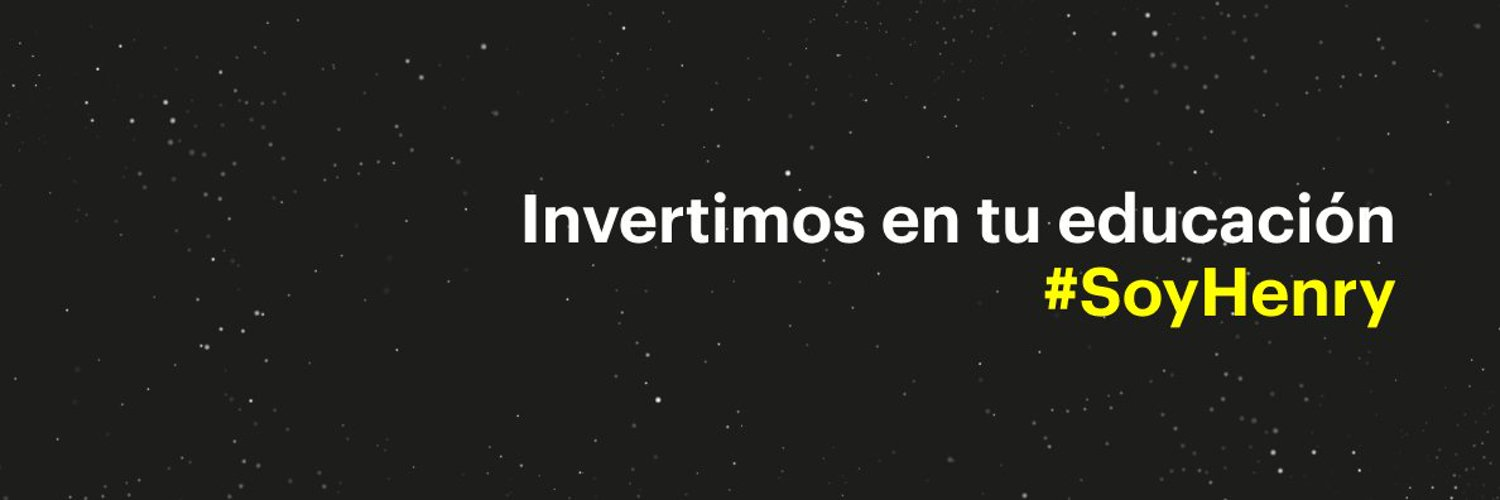